In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/ch1_sport_test.csv',
                index_col='학생번호')
df.head()

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2


In [3]:
df.악력

학생번호
1     40.2
2     34.2
3     28.8
4     39.0
5     50.9
6     36.5
7     36.6
8     49.2
9     26.0
10    47.4
Name: 악력, dtype: float64

In [4]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')
pd.set_option('precision',3) # 소수점 3자리로 출력 제한
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [5]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [6]:
scores_df = pd.DataFrame({'score':scores},
                        index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                         name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


# 대푯값
<br>

####  평균값(mean)
    데이터를 모두 더한 뒤, 데이터의 개수로 나눈다.
<br>

#### 중앙값(median)
    데이터를 크기 순서대로 나열할 때 정확히 중앙에 위치한 값.
    크기 순서로 정렬하기 때문에 이상치에 강하다는 특성을 지녔다.
    데이터가 짝수라면 중앙의 두 값의 평균을 중앙값으로 정한다.
<br>

#### 최빈값(mode 함수 사용)
    데이터에서 가장 많이 나타나는 값.

In [7]:
# 평균값
display(sum(scores)/len(scores),
       scores.mean(), # np.mean(scores)도 가능!
        scores_df.mean())

55.0

55.0

score    55.0
dtype: float64

In [8]:
# 중앙값
sorted_scores = np.sort(scores)
if len(sorted_scores)%2==0:
    n1 = sorted_scores[len(sorted_scores)//2-1]
    n2 = sorted_scores[len(sorted_scores)//2]
    n = (n1+n2)/2
else: n = sorted_scores[len(sorted_scores)//2]
    
display(n,
       np.median(scores),
       scores_df.median())

56.5

56.5

score    56.5
dtype: float64

In [9]:
# 최빈값
pd.Series([1,3,5,67,3,6,4,4,6,3,1,3,35]).mode()

0    3
dtype: int64

## 데이터의 산포도 지표
<br>

#### 편차(deviation)
    각 데이터가 평균으로부터 얼마나 떨어져 있는지를 알아보는 지표.
    (데이터 요소 값 - 평균)으로 계산하며, 편차의 평균은 항상 0이다.
<br>

#### 분산(variance)
    편차 제곱의 평균.
    산포도를 나타내는 지표이다.
<br>

#### 표준편차(standard deviation)
    분산의 제곱근.
    원래의 데이터와 같은 단위를 쓰는 산포도 지표.
<br>

#### 범위(range)
    데이터의 최댓값-최솟값만으로 산포도를 표현.
    개략적인 지표이며, 이상치에 약하다.
<br>

#### 사분위 범위(interquartile range)
    데이터의 하위 25%, 50%, 75%, 100%에 위치한 수.
    각각 제1, 2, 3, 4분위수라고 칭하며, Q1, Q2, Q3, Q4로 나타낸다.
* IQR: 상자 그림(box plot)에서 이상치를 추려내기 위한 지표<br>(Q3-Q1)로 구할 수 있다.
    * Upper whisker: 데이터에서 Q3 + 1.5IQR보다 작은 숫자 중 최댓값
    * Lower whisker: 데이터에서 Q1- 1.5IQR보다 큰 숫자 중 최솟값
    * 이 두 지표를 벗어나는 값은 이상치로 추정해 볼 수 있다.

In [10]:
# 편차
deviation = scores - scores.mean()
display(deviation,
       deviation.mean())

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

0.0

In [11]:
# 분산
var = (deviation**2).mean()
display(var,
       np.var(scores))
print(scores_df.var(), np.var(scores, ddof=1).round(3))

86.0

86.0

score    95.556
dtype: float64 95.556


In [13]:
# 표준편차
display(np.sqrt(var).round(3),
       scores.std().round(3))
print(scores_df.std(), scores.std(ddof=1).round(3))

9.274

9.274

score    9.775
dtype: float64 9.775


In [18]:
# 사분위 범위
print(np.percentile(scores,25), np.quantile(scores,0.25),'\n') # Q1
print(np.percentile(scores,75), np.quantile(scores,0.75)) # Q3

48.25 48.25 

63.25 63.25


In [21]:
# 배열을 시리즈로 만들어 통계요약표를 출력해 보자.
pd.Series(scores).describe().round(2)

count    10.00
mean     55.00
std       9.78
min      41.00
25%      48.25
50%      56.50
75%      63.25
max      69.00
dtype: float64

## 데이터의 정규화
<br>

#### 표준화(standardizaion)
$z_i = \frac{(x_i-x)}{S}$

    데이터에서 평균을 뺀 후 표준편차로 나누는 작업.
    이를 표준화 변량, 또는 Z 점수(z-score)라고 한다.
    표준화된 데이터는 평균이 0, 표준편차가 1인 가우시안 정규분포를 만족한다.
<br>

#### 편찻값
$z_i = 50 + 10*\frac{(x_i-x)}{S}$

    평균이 50, 표준편차가 10이 되도록 정규화한 값.

In [25]:
# 데이터를 표준화한 후 그 통계량을 확인해 보자.
z = (scores - scores.mean())/scores.std()
display(z, z.mean().round(3), z.std().round(3))

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

-0.0

1.0

In [26]:
# 표준화한 데이터를 편찻값으로 계산해 보자.
z = 50+10*(scores-scores.mean())/scores.std()
display(z, z.mean().round(3), z.std().round(3))

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

50.0

10.0

## 1차원 데이터의 시각화

In [61]:
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [62]:
# 50명의 영어 점수를 10점 구간으로 나눠서 도수분포표를 만들어 보자.

freq, _ = np.histogram(english_sccores, # 영어 점수에 대해
                       bins=10,         # 100점을 10점 단위로 나누니까 계급수는 10개
                       range=(0,100))   # 점수 분포는 0점에서 100점까지

# 각 구간 별로 점수 분포 도수가 freq(빈도)에 저장되었다.
# 이를 이용해 각 구간을 인덱스로 갖는 데이터프레임 freq_dist_df를 생성해 보자.

freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index = pd.Index(freq_class,name='class'))

# freq_dist_df에 계급값, 상대도수, 누적상대도수를 추가해 보자.
class_value = [(i+(i+10))//2 for i in range(0,100,10)] # //를 쓰는 건 정수인 몫을 반환하기 때문
rel_freq = freq/freq.sum()
cum_rel_freq = np.cumsum(rel_freq)
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumsum relative frequency'] = cum_rel_freq
display(freq_dist_df)

# 최빈값을 찾아볼까? 빈도가 가장 많은, 즉 빈도값이 가장 큰 곳의 계급값을 도출하면 된다.
freq_dist_df.loc[freq_dist_df.frequency.idxmax(),'class value']
# idxmax, idxmin 함수는 최댓값, 최솟값의 인덱스를 반환하는 함수이다.

,frequency,class value,relative frequency,cumsum relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


65

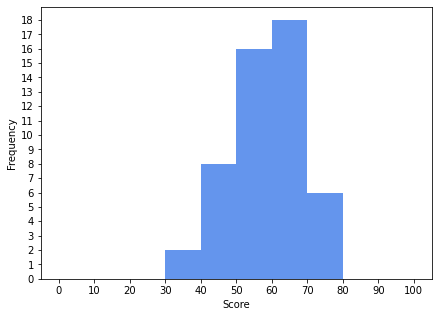

In [67]:
# 만든 것으로 히스토그램을 그려보자.

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
freq, _, _ = ax.hist(english_scores, # 점수의 빈도를 보려면 점수를 넣어야지? freq가 아니라.
                     bins=10, range=(0,100),color='cornflowerblue')
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')
ax.set_xticks(np.linspace(0,100,11)) # 0에서 100까지 11개의 동일 간격 숫자로 나누어라.
ax.set_yticks(np.arange(0, freq.max()+1)) # 아까 구한 freq나 지금 구한 freq나 매한가지이긴 함
plt.show()

In [36]:
freq_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

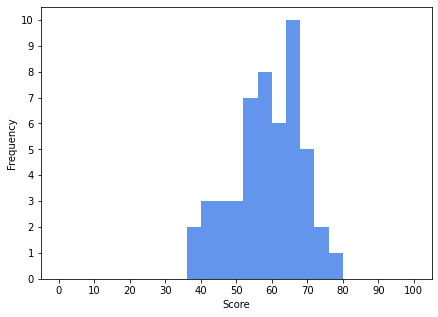

In [68]:
# 계급수를 10이 아닌 25로, 계급폭을 10이 아닌 4로 하여 그려보자.
# bins의 값만 바꿔주면 된다.
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
freq, _, _ = ax.hist(english_scores, # 점수의 빈도를 보려면 점수를 넣어야지? freq가 아니라.
                     bins=25, range=(0,100),color='cornflowerblue')
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')
ax.set_xticks(np.linspace(0,100,11)) # 0에서 100까지 11개의 동일 간격 숫자로 나누어라.
ax.set_yticks(np.arange(0, freq.max()+1)) # 아까 구한 freq나 지금 구한 freq나 매한가지이긴 함
plt.show()

In [54]:
np.linspace(0,100,11) # 나누고 싶은 눈금간격 + 1 해줘도 되긴 함

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

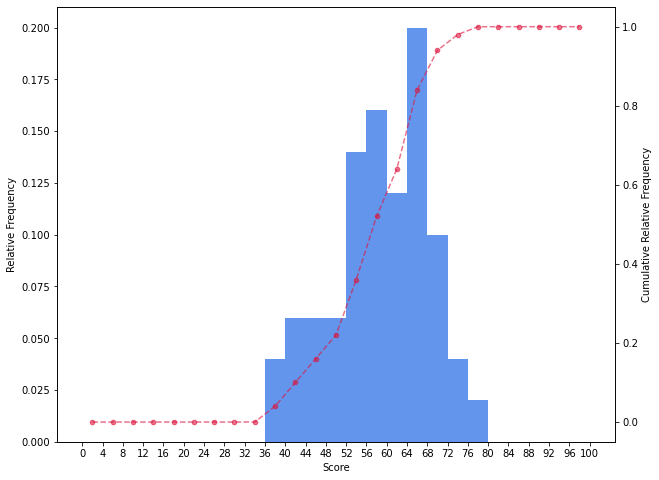

In [78]:
# 상대도수 히스토그램 + 누적상대도수 꺾은선 그래프 함께 그려보기!

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx() # ax1과 x축을 공유하는(y축은 다른) 그래프를 그리겠습니다.

# 상대도수는 도수/데이터의 수이기 때문에 weights 값으로 이를 표현한다.
weights = np.ones_like(english_scores)/len(english_scores)
# 이렇게 하면 1/데이터의 수 인, english_scores와 똑같은 크기의 배열이 생성된다.

rel_freq,_,_ = ax1.hist(english_scores, bins=25,
                        range=(0,100), weights=weights,color='cornflowerblue')
cum_rel_freq = np.cumsum(rel_freq)

class_value = [(i+(i+4))//2 for i in range(0,100,4)] # bins가 25이기 때문에 계급도 4단위

# 꺾은선 그래프 그려보자
ax2.plot(class_value,cum_rel_freq, ls="--", marker='H',
         markersize=5, color='crimson',alpha=0.6)

ax1.set_xlabel('Score')
ax1.set_ylabel('Relative Frequency')
ax2.set_ylabel('Cumulative Relative Frequency')
ax1.set_xticks(np.linspace(0,100,26))
plt.show()

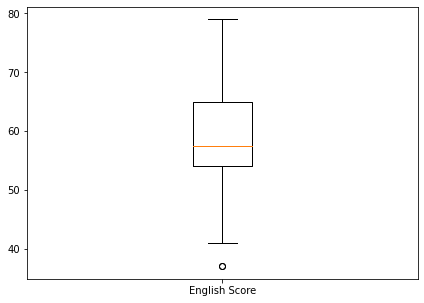

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

18    73
26    75
35    79
dtype: int64

19    37
34    37
3     41
dtype: int64

In [90]:
# 상자그림(box plot)을 그려보고 IQR와 upper, lower whisker를 구해보자.

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['English Score'])
plt.show()
display(pd.Series(english_scores).describe(),
        pd.Series(english_scores).sort_values().tail(3),
        pd.Series(english_scores).sort_values().head(3))
# 박스는 1분위~3분위 사이의 값. 빨간선은 중앙값.
# IQR = 65-54 = 9
# upper whisker = 65+13.5 = 78.5보다 작은 값 중 최댓값 == 75
# lower whisker = 54-13.5 = 40.5보다 큰 값 중 최솟값 == 41